In [5]:
import tensorflow

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from tensorflow import keras

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [10]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [11]:
len(X_train)

60000

In [12]:
len(X_test)

10000

In [13]:
X_train[0].shape

(28, 28)

In [14]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [30]:
len(Y_train)

60000

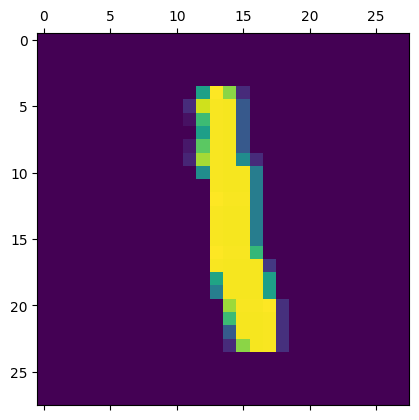

In [15]:
plt.matshow(X_train[6])

In [16]:
Y_train[6]

1

In [17]:
Y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [18]:
X_train.shape

(60000, 28, 28)

In [19]:
X_train=X_train/255
X_test=X_test/255

In [20]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [21]:
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [22]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [44]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.losses import BinaryCrossentropy

In [24]:
model=Sequential([
    Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,Y_train,epochs=5)
#exit(0)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4717 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3037 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2839 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2731 - accuracy: 0.9227
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9257


In [25]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2685 - accuracy: 0.9250


[0.26848548650741577, 0.925000011920929]

In [26]:
model.predict(X_test_flattened)

313/313 [==============================] - 1s 1ms/step


array([[3.24204192e-02, 4.90772095e-07, 5.12378775e-02, ...,
        9.99828041e-01, 7.50449300e-02, 7.00274587e-01],
       [4.16659147e-01, 3.34671536e-03, 9.99099016e-01, ...,
        7.22720874e-13, 1.08619273e-01, 2.17974194e-09],
       [4.95835324e-04, 9.94512200e-01, 5.94884455e-01, ...,
        1.65398106e-01, 3.63305330e-01, 5.60495183e-02],
       ...,
       [6.89162562e-06, 7.11242910e-06, 7.98719353e-04, ...,
        3.07497025e-01, 4.58412558e-01, 7.77346671e-01],
       [2.33765793e-04, 2.64148170e-04, 1.19876255e-04, ...,
        6.62958555e-05, 6.74544752e-01, 2.16779561e-04],
       [1.48776136e-02, 4.64805167e-10, 1.19158491e-01, ...,
        2.68250044e-08, 1.48185951e-04, 8.72422561e-07]], dtype=float32)

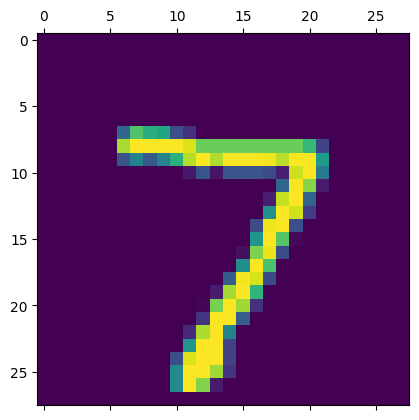

In [27]:
plt.matshow(X_test[0])

In [28]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([3.2420419e-02, 4.9077209e-07, 5.1237877e-02, 9.4218624e-01,
       2.5144061e-03, 1.1251945e-01, 1.0940781e-06, 9.9982804e-01,
       7.5044930e-02, 7.0027459e-01], dtype=float32)

In [29]:
np.argmax(y_predicted[0])

7

In [33]:
y_predicted_labels=[np.argmax(i) for i  in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [35]:
cm=tensorflow.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm=tensorflow.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    5,    2,    2,    1,    0],
       [   0, 1119,    2,    2,    0,    1,    4,    2,    5,    0],
       [  10,   10,  920,   14,   10,    3,   12,   11,   38,    4],
       [   5,    0,   18,  908,    0,   36,    2,   14,   18,    9],
       [   2,    2,    3,    1,  915,    0,   11,    4,    7,   37],
       [  12,    3,    4,   20,   10,  792,   12,    7,   25,    7],
       [  17,    3,    7,    1,    7,   15,  905,    2,    1,    0],
       [   1,    7,   21,    4,    4,    0,    0,  962,    1,   28],
       [  10,   12,    6,   19,    9,   40,    9,   14,  842,   13],
       [  11,    7,    1,    9,   27,    8,    0,   22,    4,  920]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

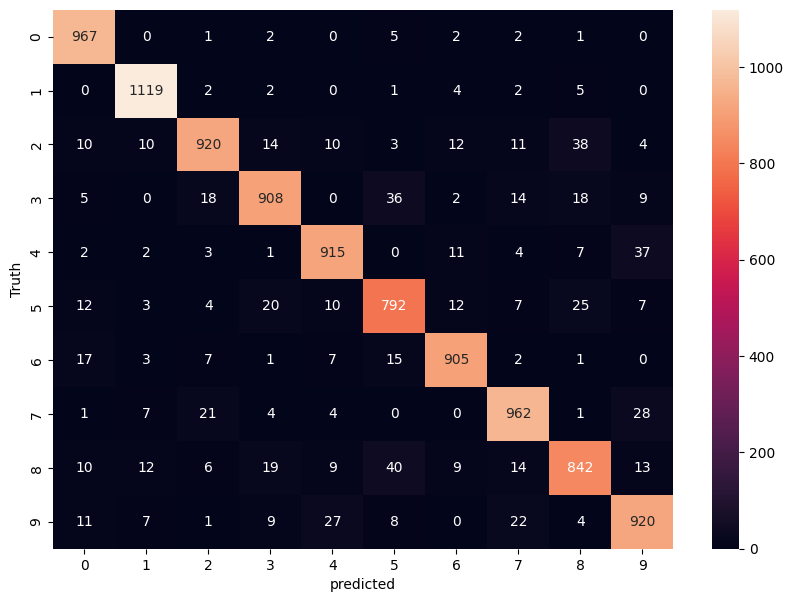

In [37]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [40]:
model=Sequential([
    Dense(100,input_shape=(784,),activation='relu'),
    Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2693 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1237 - accuracy: 0.9635
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0865 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0659 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0519 - accuracy: 0.9839


In [41]:
model.evaluate(X_test_flattened,Y_test)


313/313 [==============================] - 2s 4ms/step - loss: 0.0832 - accuracy: 0.9733


[0.0832190215587616, 0.9732999801635742]

In [42]:
y_predicted_labels=[np.argmax(i) for i  in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Text(95.72222222222221, 0.5, 'Truth')

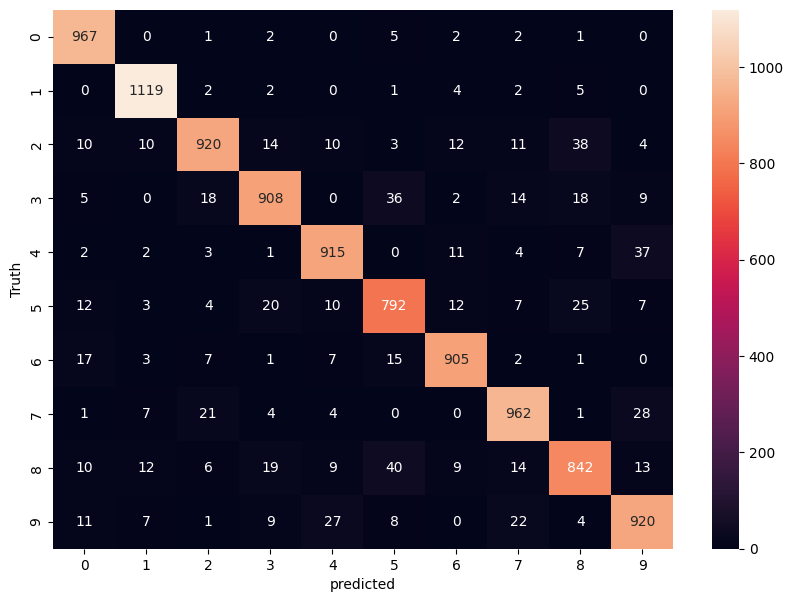

In [43]:
cm=tensorflow.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')


In [46]:
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(100,input_shape=(784,),activation='relu'),
    Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2755 - accuracy: 0.9208
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1226 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0848 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0641 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0508 - accuracy: 0.9841
